In [20]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [21]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [22]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

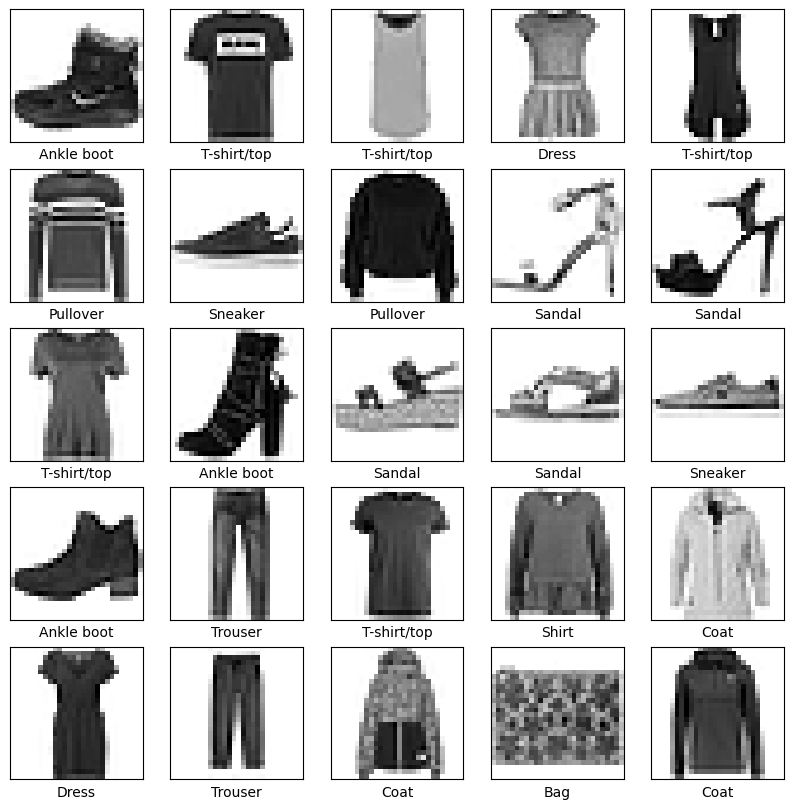

In [24]:
plt.figure(figsize=[10, 10])
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [26]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [27]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [28]:
model = Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                      

In [30]:
model.compile(
    optimizer="adam",
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [31]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
938/938 [==============================] - 272s 281ms/step - loss: 0.6526 - accuracy: 0.7684 - val_loss: 0.3542 - val_accuracy: 0.8713
Epoch 2/20
938/938 [==============================] - 135s 143ms/step - loss: 0.3827 - accuracy: 0.8622 - val_loss: 0.2929 - val_accuracy: 0.8948
Epoch 3/20
938/938 [==============================] - 143s 152ms/step - loss: 0.3233 - accuracy: 0.8844 - val_loss: 0.2950 - val_accuracy: 0.8954
Epoch 4/20
938/938 [==============================] - 143s 152ms/step - loss: 0.2946 - accuracy: 0.8957 - val_loss: 0.2810 - val_accuracy: 0.8979
Epoch 5/20
938/938 [==============================] - 136s 145ms/step - loss: 0.2733 - accuracy: 0.9010 - val_loss: 0.2463 - val_accuracy: 0.9086
Epoch 6/20
938/938 [==============================] - 145s 154ms/step - loss: 0.2590 - accuracy: 0.9076 - val_loss: 0.2226 - val_accuracy: 0.9176
Epoch 7/20
938/938 [==============================] - 139s 149ms/step - loss: 0.2468 - accuracy: 0.9117 - val_loss: 0.2319 -

In [32]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 8s - loss: 0.1785 - accuracy: 0.9397 - 8s/epoch - 25ms/step


In [33]:
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9397000074386597


Text(0.5, 1.0, 'Loss Curves')

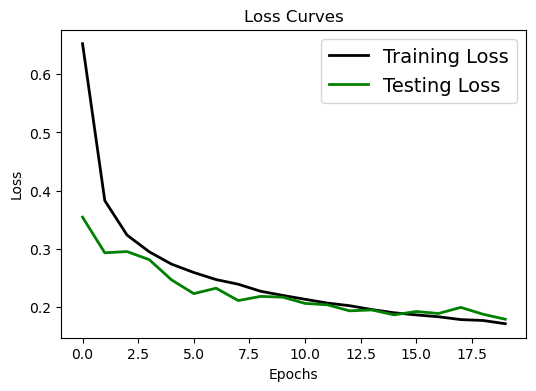

In [34]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Testing Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

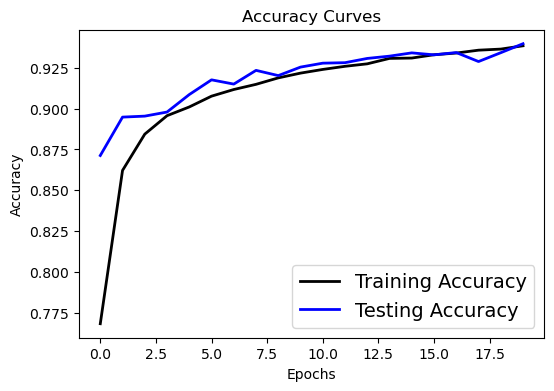

In [35]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Testing Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [36]:
pred = model.predict(test_images)
print(pred)

313/313 [==============================] - 9s 29ms/step
[[9.45736198e-11 7.14507831e-09 2.36326625e-10 ... 6.82977843e-05
  1.10157924e-10 9.99930978e-01]
 [5.00265160e-05 3.72739102e-08 9.99754488e-01 ... 5.76668757e-09
  2.70979807e-08 2.35820536e-08]
 [9.16547904e-08 9.99999762e-01 2.36091733e-08 ... 1.14356491e-09
  4.69291450e-09 3.63396424e-09]
 ...
 [1.03409503e-09 3.46624777e-11 1.26943311e-09 ... 8.77417472e-10
  1.00000000e+00 4.53841675e-09]
 [7.36355688e-09 1.00000000e+00 3.42658035e-09 ... 2.52400462e-10
  3.48665236e-10 9.33674804e-10]
 [1.02475582e-07 2.06842881e-08 1.45860540e-07 ... 5.81194228e-03
  1.00503541e-06 9.12930918e-05]]


In [37]:
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[9 2 1 ... 8 1 5]


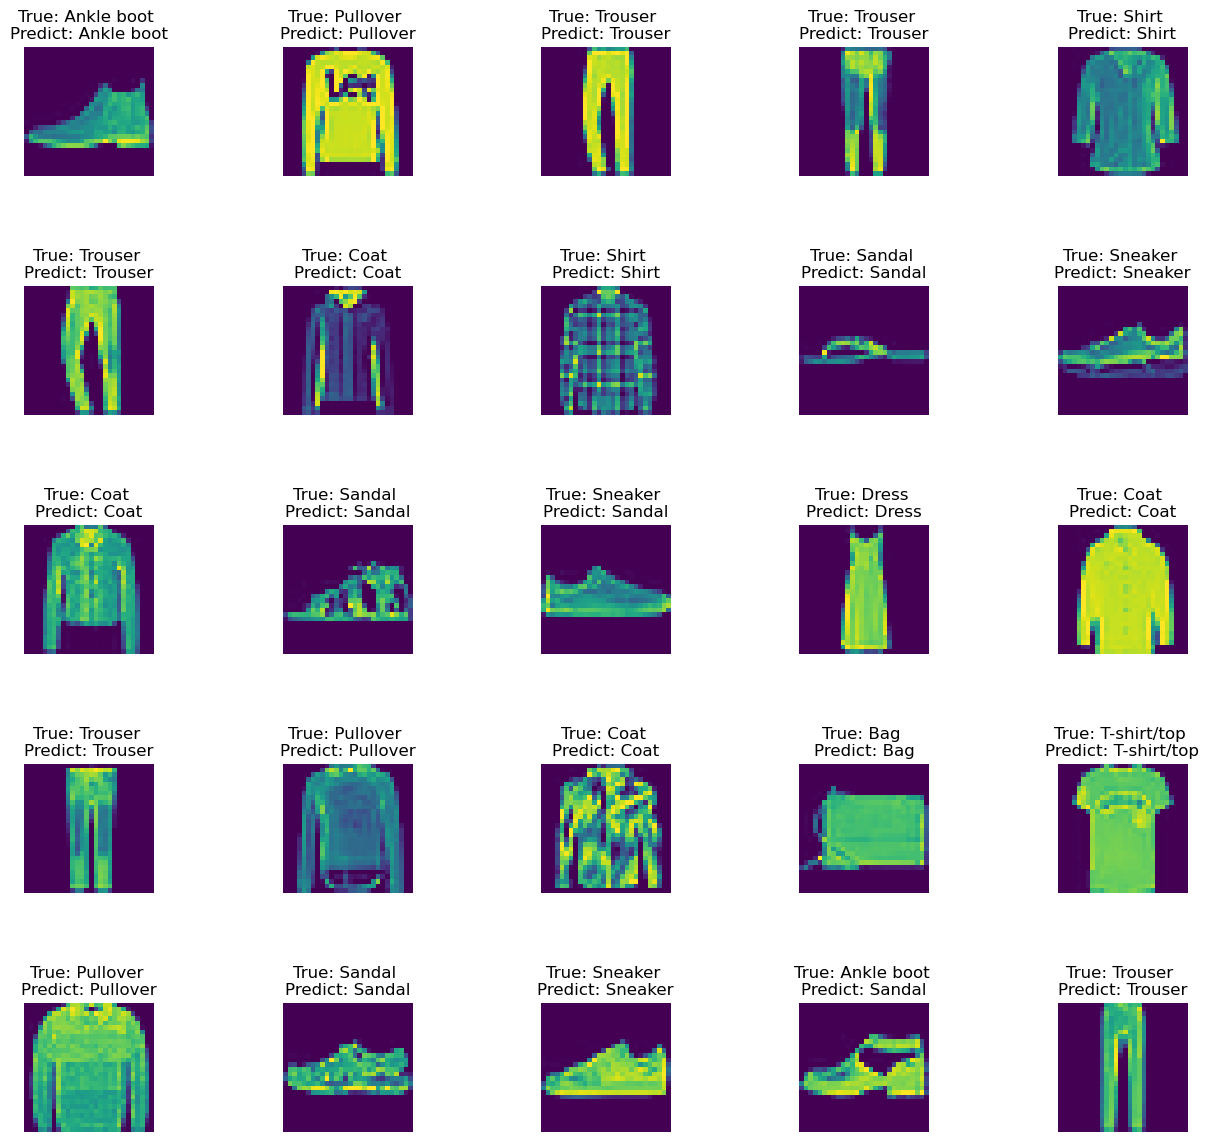

In [38]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [39]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model_weights.h5')